Кількість вузлів: 6
Кількість ребер: 8
Ступінь зв'язку для кожного вузла:
Олександр: 3
Марія: 3
Іван: 4
Олена: 4
Андрій: 1
Катерина: 1
Betweenness Centrality:
Олександр: 0.00
Марія: 0.00
Іван: 0.10
Олена: 0.15
Андрій: 0.00
Катерина: 0.00
Closeness Centrality:
Олександр: 0.00
Марія: 0.20
Іван: 0.40
Олена: 0.60
Андрій: 0.36
Катерина: 0.46


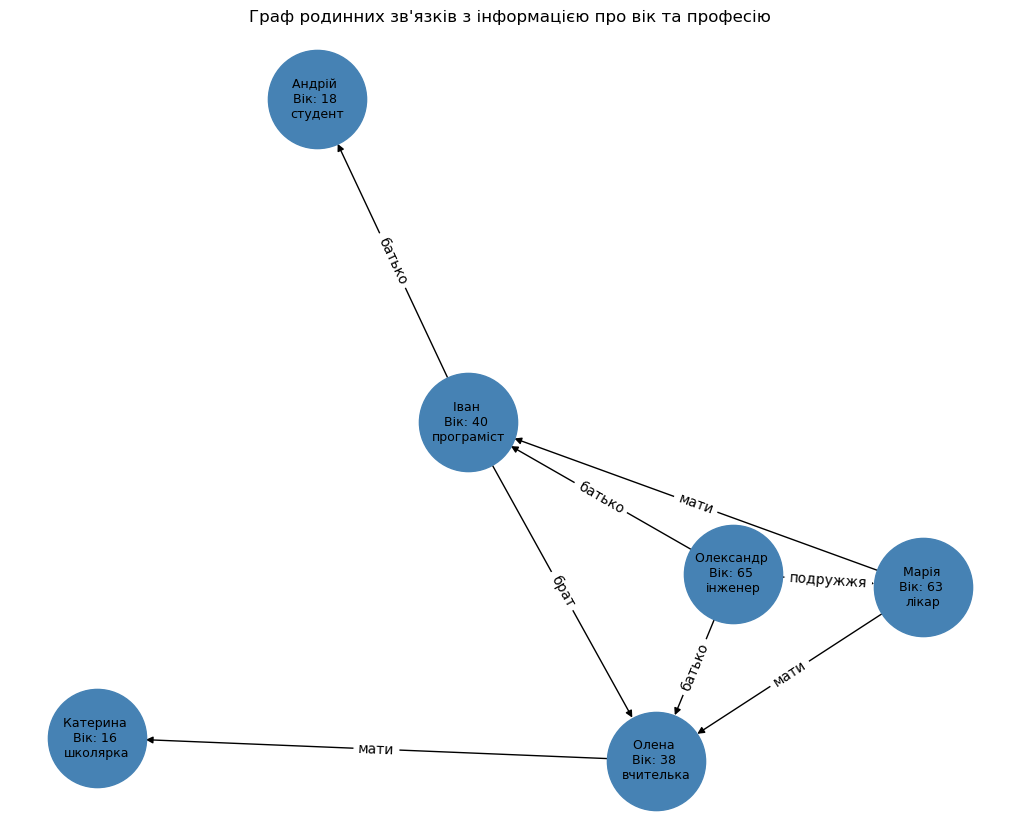

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Ініціалізація графа
family_graph = nx.DiGraph()  # Орієнтований граф для врахування напрямку відносин

# Додавання вузлів (членів родини)
family_graph.add_node("Олександр", age=65, gender="male", profession="інженер")
family_graph.add_node("Марія", age=63, gender="female", profession="лікар")
family_graph.add_node("Іван", age=40, gender="male", profession="програміст")
family_graph.add_node("Олена", age=38, gender="female", profession="вчителька")
family_graph.add_node("Андрій", age=18, gender="male", profession="студент")
family_graph.add_node("Катерина", age=16, gender="female", profession="школярка")

# Додавання ребер (родинних зв'язків)
family_graph.add_edge("Олександр", "Іван", relation="батько")
family_graph.add_edge("Марія", "Іван", relation="мати")
family_graph.add_edge("Олександр", "Олена", relation="батько")
family_graph.add_edge("Марія", "Олена", relation="мати")
family_graph.add_edge("Іван", "Андрій", relation="батько")
family_graph.add_edge("Олена", "Катерина", relation="мати")
family_graph.add_edge("Іван", "Олена", relation="брат")
family_graph.add_edge("Олександр", "Марія", relation="подружжя")

# Кількість вузлів та ребер
num_nodes = family_graph.number_of_nodes()
num_edges = family_graph.number_of_edges()
print(f"Кількість вузлів: {num_nodes}")
print(f"Кількість ребер: {num_edges}")

# Ступінь зв'язку для кожного члена родини
degrees = {node: family_graph.degree(node) for node in family_graph.nodes()}
print("Ступінь зв'язку для кожного вузла:")
for member, degree in degrees.items():
    print(f"{member}: {degree}")

# Обчислення центральності вузлів
betweenness = nx.betweenness_centrality(family_graph)
closeness = nx.closeness_centrality(family_graph)
print("Betweenness Centrality:")
for member, value in betweenness.items():
    print(f"{member}: {value:.2f}")

print("Closeness Centrality:")
for member, value in closeness.items():
    print(f"{member}: {value:.2f}")

# Візуалізація графа
plt.figure(figsize=(10, 8))

# Позиції вузлів для кращого вигляду
pos = nx.spring_layout(family_graph)

# Створення підписів вузлів із віком та професією
labels_with_info = {node: f"{node} \nВік: {data['age']} \n{data['profession']}" for node, data in family_graph.nodes(data=True)}

# Візуалізація вузлів і ребер
nx.draw(family_graph, pos, with_labels=True, labels=labels_with_info, node_color="steelblue", node_size=5000, font_size=9)
nx.draw_networkx_edge_labels(family_graph, pos, font_color='black', edge_labels={(u, v): d['relation'] for u, v, d in family_graph.edges(data=True)})

plt.title("Граф родинних зв'язків з інформацією про вік та професію")
plt.show()

In [25]:
help(nx.draw)

Help on function draw in module networkx.drawing.nx_pylab:

draw(G, pos=None, ax=None, **kwds)
    Draw the graph G with Matplotlib.

    Draw the graph as a simple representation with no node
    labels or edge labels and using the full Matplotlib figure area
    and no axis labels by default.  See draw_networkx() for more
    full-featured drawing that allows title, axis labels etc.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary, optional
        A dictionary with nodes as keys and positions as values.
        If not specified a spring layout positioning will be computed.
        See :py:mod:`networkx.drawing.layout` for functions that
        compute node positions.

    ax : Matplotlib Axes object, optional
        Draw the graph in specified Matplotlib axes.

    kwds : optional keywords
        See networkx.draw_networkx() for a description of optional keywords.

    Examples
    --------
    >>> G = nx.dodecahedral_graph()
    >>> nx.